**Connect collab Notebook file with Google Drive.**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries such as numpy, pandas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as piplot

**Load the datasets from Drive**

In [ ]:

train_data_set = pd.read_csv('/content/drive/MyDrive/ML Data Set/train.csv')
test_data_set = pd.read_csv('/content/drive/MyDrive/ML Data Set/test.csv')


**Display Some Records of Data**

In [ ]:
print("Ten Train Data set examples :\n", train_data_set.head(10))
print("Ten Test Data set examples:\n", test_data_set.head(10))

Ten Train Data set examples :
     x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984
5  36  32.463875
6  12  10.780897
7  81  80.763399
8  25  24.612151
9   5   6.963319
Ten Test Data set examples:
     x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
5  15   9.805235
6  62  58.874659
7  95  97.617937
8  20  18.395127
9   5   8.746748


**Converting Pandas frame into Numpy Arrays**

In [ ]:
X_train = train_data_set['x'].values
y_train = train_data_set['y'].values

X_test = test_data_set['x'].values
y_test = test_data_set['y'].values

**Data's Shape**

In [ ]:

print("Shape of X_train data :", X_train.shape)
print("Shape of y_train data :",  y_train.shape)

print("Shape of X_test data:", X_test.shape)
print("Shape of y_test data:", y_test.shape)

Shape of X_train data : (699,)
Shape of y_train data : (699,)
Shape of X_test data: (300,)
Shape of y_test data: (300,)


**Trainig**

In [ ]:
def hypothesisFn(theta0, theta1, trainigExample):
    return theta0 + theta1 * trainigExample

In [ ]:
def cost_computation(theta0, theta1, X, y):
    m = len(y)
    predicted_y = hypothesisFn(theta0, theta1, X)
    return (1/(2*m)) * np.sum((predicted_y - y) ** 2)

In [ ]:
theta0_ranges = np.arange(-0.5, 1.6, 0.1)
theta1_ranges = np.arange(-0.5, 1.6, 0.1)

In [ ]:
optimal_theta0 = 0
optimal_theta1 = 0
min_cost = float('inf')

In [ ]:
for theta0 in theta0_ranges:
    for theta1 in theta1_ranges:
        cost = cost_computation(theta0, theta1, X_train, y_train)
        if cost < min_cost:
            min_cost = cost
            optimal_theta0 = theta0
            optimal_theta1 = theta1

In [ ]:
print(f"Most Optimal theta0 in selected range: {optimal_theta0}, Optimal theta1 in selected range: {optimal_theta1}, Minimum Cost: {min_cost}")

Most Optimal theta0 in selected range: -0.10000000000000009, Optimal theta1 in selected range: 0.9999999999999996, Minimum Cost: 3.934383442065976


**Predict the output for the test dataset**

In [ ]:
y_pred = hypothesisFn(optimal_theta0, optimal_theta1, X_test)


mse_test = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Data: {mse_test}")

Mean Squared Error on Test Data: 9.466407919454753


**Graphs of the predicted output and actual output**

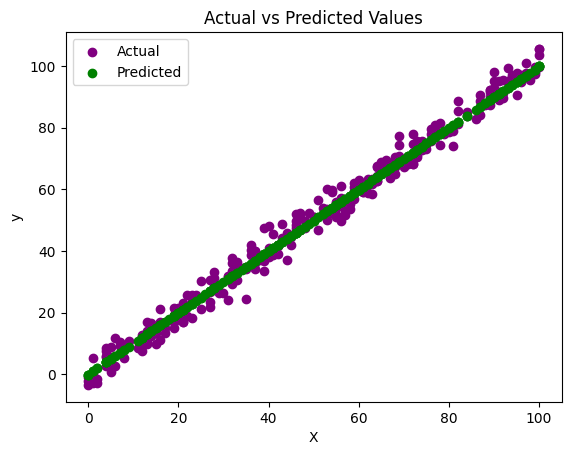

In [ ]:
piplot.scatter(X_test, y_test, color='purple', label='Actual')
piplot.scatter(X_test, y_pred, color='green', label='Predicted')
piplot.xlabel('X')
piplot.ylabel('y')
piplot.title('Actual vs Predicted Values')
piplot.legend()
piplot.show()